任务：基于transfer_data.csv文件，建立MLP 模型，并利用迁移学习预测未知数据。

1. 实现x对y的预测，可视化结果
2. 利用transfer_data2.csv文件，对前模型进行二次训练，对比模型训练次数少的情况下的表现

      x         y
0  0.06   11.1236
1 -2.16   11.3456
2  6.38   64.4644
3  9.42  118.5764
4  8.58  101.7764


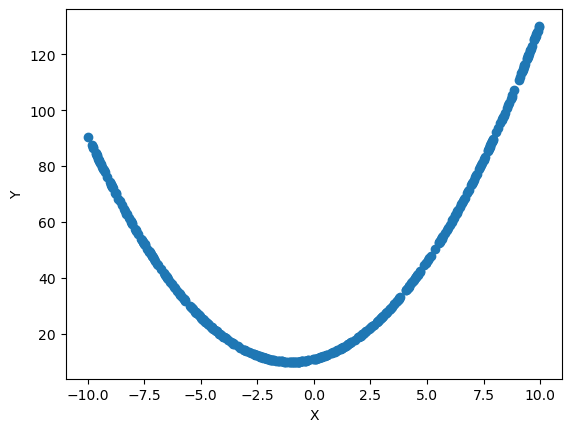

In [39]:
#load the data
import pandas as pd
import numpy as np

data = pd.read_csv('data/transfer_data.csv')
print(data.head())

X = data.loc[:,'x']
y = data.loc[:,'y']

#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [40]:
# set up model
X = np.array(X).reshape(-1, 1)
print(X.shape, y.shape)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()



(400, 1) (400,)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
# train the model
model.fit(X, y, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3196.6826  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3204.0020 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3164.9834  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2899.3364 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2602.9722 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3178.5576 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2551.1028 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2823.6023 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2500.9993 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2680.9207 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2571.2766 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2258.2964 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2222.4685 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1962.2771 
Epoch 15/100


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


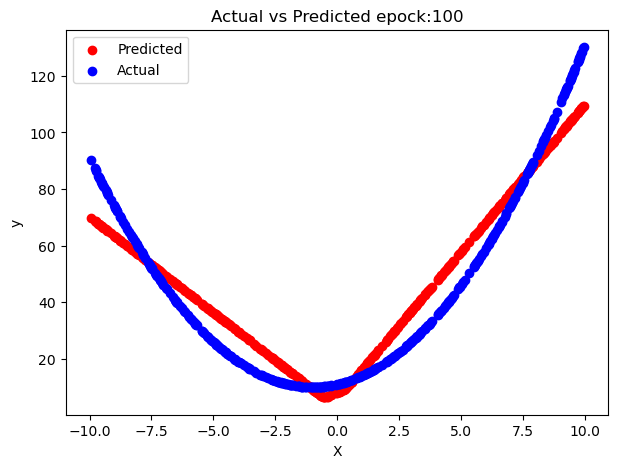

In [42]:
def show_prediction(model, X, y,epock):
    y_pred = model.predict(X)

    fig2 = plt.figure(figsize=(7, 5))
    plt.scatter(X,y_pred,color='red',label='Predicted')
    plt.scatter(X,y,color='blue',label='Actual')
    plt.title('Actual vs Predicted epock:'+str(epock))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

show_prediction(model, X, y,100)


Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.5455 
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.0314 
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.9690 
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.6940 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.2816  
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.6301 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.5867 
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.7475 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.1442 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.7526 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2428 
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.3450 
Epoch 13/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.8506 
Epoch 14/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.7094 
Epoch 15/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

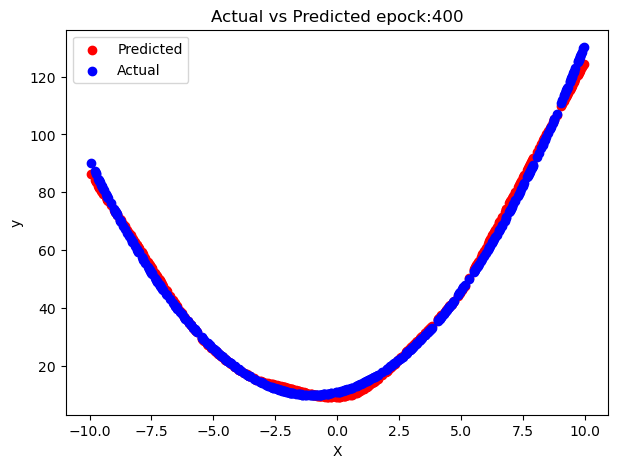

In [44]:
model.fit(X, y, epochs=300)
show_prediction(model, X, y,400)

In [45]:
#save and load model
import joblib

# save model
joblib.dump(model, 'model.pkl')

# load model
model2 = joblib.load('model.pkl')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


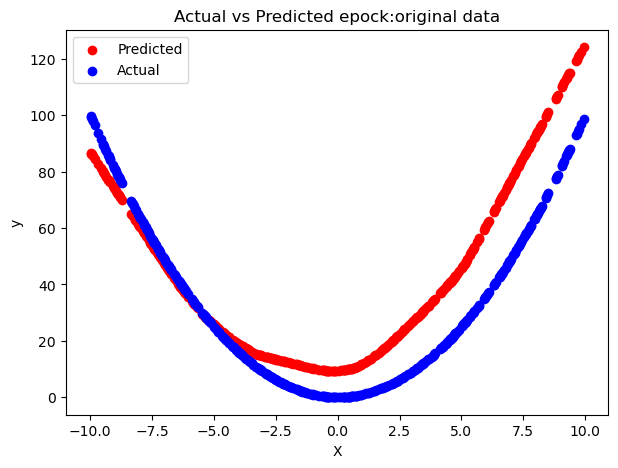

In [46]:
data2 = pd.read_csv('data/transfer_data2.csv')

X2 = data2.loc[:,'x']
y2 = data2.loc[:,'y']
X2 = np.array(X2).reshape(-1, 1)
# predict and visualize use model2
show_prediction(model2, X2, y2, 'original data')

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 222.7045  
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.9970  
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.5406 
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.9621  
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.0028  
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.6784 
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.6775 
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5503 
Epoch 9/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.8562  
Epoch 10/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.7122 
Epoch 11/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.2849 
Epoch 12/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.3443  
Epoch 13/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7806 
Epoch 14/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1641 
Epoch 15/200
13/13 ━━━━━━━━━━━━━━━━━

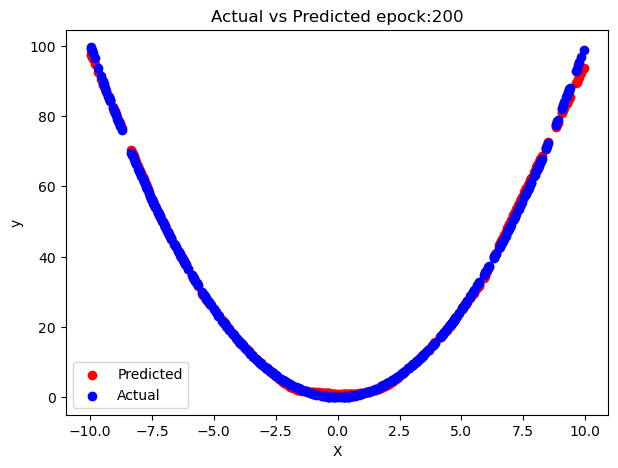

In [47]:
model2.fit(X2,y2,epochs = 20)
show_prediction(model2, X2, y2, '20')

In [ ]:
model2.fit(X2,y2,epochs = 80)
show_prediction(model2, X2, y2, '100')